## Imports

In [1]:
import pandas as pd
import numpy as np
import re
from icecream import ic

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Load Dataset

In [2]:
source_filepath = '../datasets/oecd-population.csv'
target_filepath = '../plots'
oecd_pop_df = pd.read_csv(source_filepath)

In [3]:
oecd_pop_df.head()

,COUNTRY,Country,SEX,Gender,AGE,Age,YEAR,Year,Value,Flag Codes,Flags
0,AUS,Australia,F,Female,Y2,2 years,2000,2000,122824.0,NaN,NaN
1,AUS,Australia,F,Female,Y2,2 years,2005,2005,123149.0,NaN,NaN
2,AUS,Australia,F,Female,Y2,2 years,2010,2010,142144.0,NaN,NaN
3,AUS,Australia,F,Female,Y2,2 years,2011,2011,142664.0,NaN,NaN
4,AUS,Australia,F,Female,Y2,2 years,2012,2012,145990.0,NaN,NaN


In [4]:
oecd_pop_df.shape

(92907, 11)

## Data Preprocessing

In [5]:
cols_of_interest = ['Country', 'Gender', 'Age', 'Year', 'Value']

oecd_pop = oecd_pop_df[cols_of_interest]
oecd_pop.head()

,Country,Gender,Age,Year,Value
0,Australia,Female,2 years,2000,122824.0
1,Australia,Female,2 years,2005,123149.0
2,Australia,Female,2 years,2010,142144.0
3,Australia,Female,2 years,2011,142664.0
4,Australia,Female,2 years,2012,145990.0


In [6]:
#Input Parameters

selected_genders = ['Total']
selected_country = 'Japan'
group_age_by = 15

include_65_above = True

In [7]:
#Data Filtering

oecd_pop = oecd_pop[oecd_pop['Gender'].isin(selected_genders)].drop('Gender', axis=1)
oecd_pop = oecd_pop.query('Country == @selected_country').drop('Country', axis=1)
oecd_pop.head()

,Age,Year,Value
56838,31 years,2000,1818000.0
56839,31 years,2005,2022000.0
56840,31 years,2010,1652750.0
56841,31 years,2011,1617116.0
56842,31 years,2012,1571785.0


In [8]:
oecd_pop.Age.unique()

array(['31 years', 'From 50 to 54 years', '32 years', '41 years',
       '22 years', '28 years', '37 years', '3 years', '26 years',
       '7 years', '16 years', '17 years', '5 years', '11 years',
       '49 years', '46 years', '40 years', '23 years', '14 years',
       'From 10 to 14 years', '20 years', '35 years', '45 years',
       '36 years', '2 years', '8 years', '13 years', '48 years', 'Total',
       '34 years', '65 years or over', '38 years', '47 years', '24 years',
       '15 years', '25 years', '19 years', '44 years', '1 year',
       '21 years', '43 years', '0 years', '12 years', '10 years',
       '30 years', 'Unknown', '33 years', 'From 60 to 64 years',
       '39 years', '42 years', '4 years', '27 years',
       'From 55 to 59 years', '29 years', '6 years', '18 years',
       '9 years'], dtype=object)

In [9]:
def generate_age_groups_dict(group_age_by):
    _REFERENCE_AGE = 65
    age_groups_dict = dict()

    gen_key = lambda n_years: f'{n_years} years' if n_years != 1 else '1 year'
    get_age_groups = lambda *args: \
        f'{args[0]} years' if args[0] == args[1] else f'{age-group_age_by} years to {age-1} years'

    age = _REFERENCE_AGE
    if age >= 65: 
        ages_group = '65 years or over'
        age_groups_dict[ages_group] = ages_group
    while age > 50:
        ages_group = get_age_groups(age-group_age_by, age-1)
        for init_age in range(age-group_age_by, age, 5):
            if init_age+5 > 50:
                age_groups_dict[f'From {init_age} to {init_age+5-1} years'] = ages_group
            else:
                age_groups_dict.update({gen_key(i):ages_group for i in range(init_age, init_age+5)})
        age -= group_age_by
    while age > 0 and age >= group_age_by:
        ages_group = f'{get_age_groups(age-group_age_by, age-1)}'
        age_groups_dict.update({gen_key(i):ages_group for i in range(age-group_age_by, age)})
        age -= group_age_by
    if age > 0:
        ages_group = f'below {age} years'
        age_groups_dict.update({gen_key(i): ages_group for i in range(0, age)})

    return age_groups_dict

In [10]:
age_groups = generate_age_groups_dict(group_age_by)
age_groups

{'65 years or over': '65 years or over',
 'From 50 to 54 years': '50 years to 64 years',
 'From 55 to 59 years': '50 years to 64 years',
 'From 60 to 64 years': '50 years to 64 years',
 '35 years': '35 years to 49 years',
 '36 years': '35 years to 49 years',
 '37 years': '35 years to 49 years',
 '38 years': '35 years to 49 years',
 '39 years': '35 years to 49 years',
 '40 years': '35 years to 49 years',
 '41 years': '35 years to 49 years',
 '42 years': '35 years to 49 years',
 '43 years': '35 years to 49 years',
 '44 years': '35 years to 49 years',
 '45 years': '35 years to 49 years',
 '46 years': '35 years to 49 years',
 '47 years': '35 years to 49 years',
 '48 years': '35 years to 49 years',
 '49 years': '35 years to 49 years',
 '20 years': '20 years to 34 years',
 '21 years': '20 years to 34 years',
 '22 years': '20 years to 34 years',
 '23 years': '20 years to 34 years',
 '24 years': '20 years to 34 years',
 '25 years': '20 years to 34 years',
 '26 years': '20 years to 34 years',
 

## Aggregation

In [11]:
#Age to Age Groups

oecd_pop['Age'].replace(age_groups, inplace=True)
oecd_pop = oecd_pop.query('Age in @age_groups.values()')
oecd_pop.head()

,Age,Year,Value
56838,20 years to 34 years,2000,1818000.0
56839,20 years to 34 years,2005,2022000.0
56840,20 years to 34 years,2010,1652750.0
56841,20 years to 34 years,2011,1617116.0
56842,20 years to 34 years,2012,1571785.0


In [12]:
#GroupBy

oecd_pop_agg = oecd_pop.groupby(['Year', 'Age'])['Value'].sum()
oecd_pop_agg

Year  Age                 
2000  20 years to 34 years    27463000.0
      35 years to 49 years    25256000.0
      5 years to 19 years     20446000.0
      50 years to 64 years    26385000.0
      65 years or over        21186000.0
                                 ...    
2021  35 years to 49 years    25843073.0
      5 years to 19 years     16196548.0
      50 years to 64 years    24120603.0
      65 years or over        36026632.0
      below 5 years            4541360.0
Name: Value, Length: 84, dtype: float64

In [13]:
#Sorting

get_nums = lambda str: tuple([int(match) for match in re.findall(r'\d+', str)])
age_groups_list = sorted(oecd_pop_agg.index.get_level_values(level=1).unique(), key=get_nums)
oecd_pop_agg = oecd_pop_agg.reindex(age_groups_list, level=1)
oecd_pop_agg

Year  Age                 
2000  below 5 years            5950000.0
      5 years to 19 years     20446000.0
      20 years to 34 years    27463000.0
      35 years to 49 years    25256000.0
      50 years to 64 years    26385000.0
                                 ...    
2021  5 years to 19 years     16196548.0
      20 years to 34 years    19417883.0
      35 years to 49 years    25843073.0
      50 years to 64 years    24120603.0
      65 years or over        36026632.0
Name: Value, Length: 84, dtype: float64

## Plotting

NameError: name 'y' is not defined

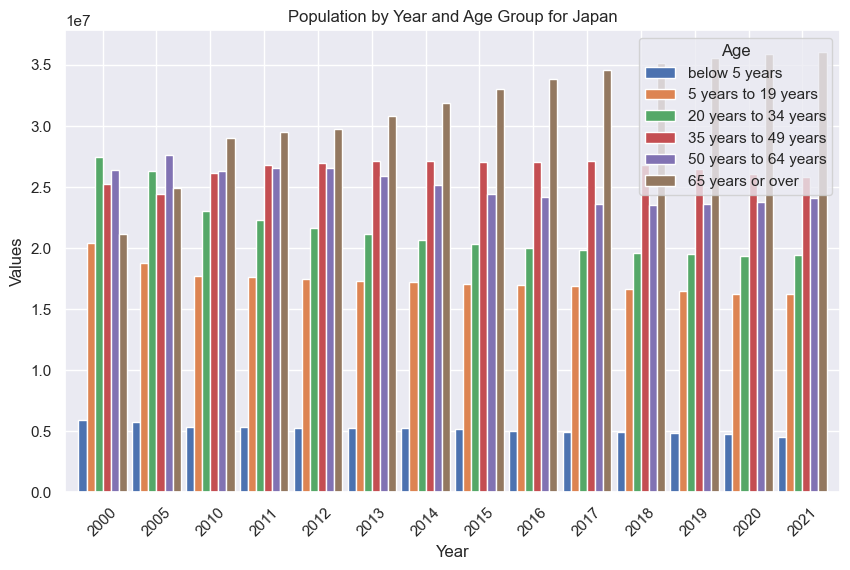

In [14]:
# Plotting
df_plot = oecd_pop_agg.unstack()

ax = df_plot.plot(kind='bar', width=0.9, figsize=(10, 6), rot=45)

ax.set_ylabel('Values')
ax.set_title(f'Population by Year and Age Group for {selected_country}')
y_ticks = ['1,000,000', '2,000,000', '3,0000,00', '4,000,000', '5,000,000', '6,000,000', '7,000,000', '8,000,000', '9,000,000', '10,000,000']
y
# ax.set_yticklabels(y_ticks)

plt.show()